In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import calendar
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


In [2]:
df_raw = pd.read_csv('../input/hotel-booking-demand/hotel_bookings.csv')

In [3]:
df = df_raw[(df_raw['is_canceled'] == 0) & (df_raw['hotel'] == 'City Hotel')]

In [4]:
name_to_num = {name: num for num, name in enumerate(calendar.month_name) if num}
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: name_to_num[x])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df['arrival'] = df.apply(lambda row: datetime.strptime(f"{int(row.arrival_date_year)}-{int(row.arrival_date_month)}-{int(row.arrival_date_day_of_month)}", '%Y-%m-%d'), axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46228 entries, 40060 to 119389
Data columns (total 33 columns):
hotel                             46228 non-null object
is_canceled                       46228 non-null int64
lead_time                         46228 non-null int64
arrival_date_year                 46228 non-null int64
arrival_date_month                46228 non-null int64
arrival_date_week_number          46228 non-null int64
arrival_date_day_of_month         46228 non-null int64
stays_in_weekend_nights           46228 non-null int64
stays_in_week_nights              46228 non-null int64
adults                            46228 non-null int64
children                          46228 non-null float64
babies                            46228 non-null int64
meal                              46228 non-null object
country                           46226 non-null object
market_segment                    46228 non-null object
distribution_channel              46228 non-null object

In [40]:
df.head(n=10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival,reservation
40060,City Hotel,0,6,2015,7,27,1,0,2,1,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-03,2015-07-01,2015-06-25
40066,City Hotel,0,3,2015,7,27,2,0,3,1,...,NaN,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05,2015-07-02,2015-06-29
40070,City Hotel,0,43,2015,7,27,3,0,2,2,...,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2015-07-03,2015-05-21
40071,City Hotel,0,43,2015,7,27,3,0,2,2,...,NaN,0,Transient-Party,43.00,0,0,Check-Out,2015-07-05,2015-07-03,2015-05-21
40072,City Hotel,0,43,2015,7,27,3,0,2,2,...,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2015-07-03,2015-05-21
40073,City Hotel,0,4,2015,7,27,3,0,2,1,...,NaN,0,Transient-Party,63.00,0,0,Check-Out,2015-07-05,2015-07-03,2015-06-29
40075,City Hotel,0,43,2015,7,27,3,0,2,1,...,NaN,0,Transient-Party,63.00,0,0,Check-Out,2015-07-05,2015-07-03,2015-05-21
40077,City Hotel,0,43,2015,7,27,3,0,2,2,...,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2015-07-03,2015-05-21
40078,City Hotel,0,43,2015,7,27,3,0,2,2,...,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2015-07-03,2015-05-21
40082,City Hotel,0,43,2015,7,27,3,0,2,2,...,NaN,0,Transient-Party,86.00,0,0,Check-Out,2015-07-05,2015-07-03,2015-05-21


In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,46228.0,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,46228.000000,...,46228.000000,46228.000000,46228.000000,46228.000000,40706.000000,2905.000000,46228.000000,46228.000000,46228.000000,46228.000000
mean,0.0,80.702734,2016.176062,6.546054,27.159535,15.818616,0.800684,2.122934,1.828113,0.099896,...,0.034416,0.021156,0.208510,0.264364,28.081511,143.195869,2.150082,105.745948,0.041814,0.741088
std,0.0,89.863028,0.690836,3.073564,13.562081,8.729889,0.861508,1.400799,0.536068,0.386141,...,0.182298,0.336915,2.123928,0.709713,56.321663,119.933759,17.576460,40.596109,0.201137,0.833852
min,0.0,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,12.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,40.000000,0.000000,80.000000,0.000000,0.000000
50%,0.0,50.000000,2016.000000,7.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,91.000000,0.000000,99.900000,0.000000,1.000000
75%,0.0,121.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,219.000000,0.000000,126.000000,0.000000,1.000000
max,0.0,518.000000,2017.000000,12.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,...,1.000000,13.000000,72.000000,21.000000,509.000000,497.000000,379.000000,510.000000,3.000000,5.000000


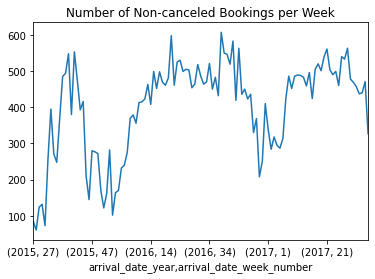

In [8]:
series = df.groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series.plot()
plt.title('Number of Non-canceled Bookings per Week')
plt.show()

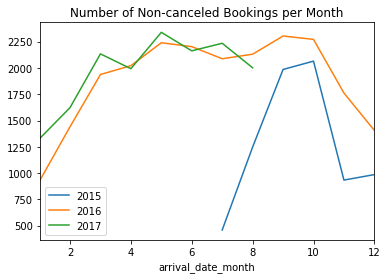

In [9]:
series15_month = df[df['arrival_date_year'] == 2015].groupby(['arrival_date_month'])['hotel'].count()
series16_month = df[df['arrival_date_year'] == 2016].groupby(['arrival_date_month'])['hotel'].count()
series17_month = df[df['arrival_date_year'] == 2017].groupby(['arrival_date_month'])['hotel'].count()

series15_month.plot()
series16_month.plot()
series17_month.plot()

plt.title('Number of Non-canceled Bookings per Month')
plt.legend(['2015','2016','2017'])
plt.show()

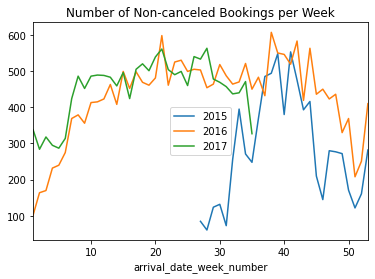

In [10]:
series15_week = df[df['arrival_date_year'] == 2015].groupby(['arrival_date_week_number'])['hotel'].count()
series16_week = df[df['arrival_date_year'] == 2016].groupby(['arrival_date_week_number'])['hotel'].count()
series17_week = df[df['arrival_date_year'] == 2017].groupby(['arrival_date_week_number'])['hotel'].count()

series15_week.plot()
series16_week.plot()
series17_week.plot()

plt.legend(['2015','2016','2017'])
plt.title('Number of Non-canceled Bookings per Week')
plt.show()

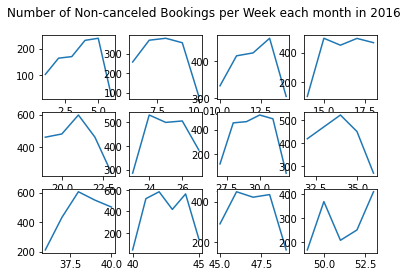

In [21]:
fig, axs = plt.subplots(3, 4)
fig.suptitle('Number of Non-canceled Bookings per Week each month in 2016')
for i in range(1,5):
    series16_i_week = df[(df['arrival_date_year'] == 2016) & (df['arrival_date_month'] == i) ].groupby(['arrival_date_week_number'])['hotel'].count()
    axs[0,i-1].plot(series16_i_week)

for i in range(5,9):
    series16_i_week = df[(df['arrival_date_year'] == 2016) & (df['arrival_date_month'] == i) ].groupby(['arrival_date_week_number'])['hotel'].count()
    axs[1,i-5].plot(series16_i_week)
    
for i in range(9,13):
    series16_i_week = df[(df['arrival_date_year'] == 2016) & (df['arrival_date_month'] == i) ].groupby(['arrival_date_week_number'])['hotel'].count()
    axs[2,i-9].plot(series16_i_week)

plt.show()


50.0

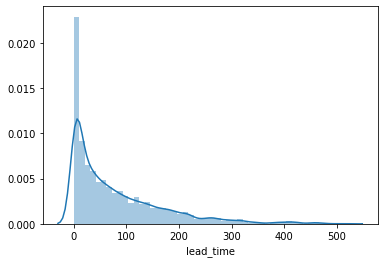

In [12]:
sns.distplot(df['lead_time'])
df['lead_time'].median()

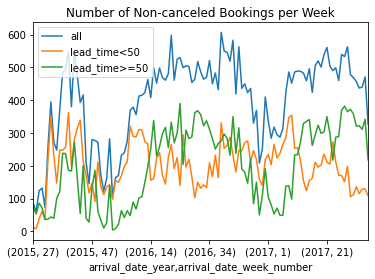

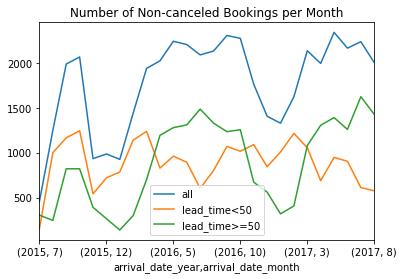

In [41]:
plt.figure(1)
series_leadtime1_week = df[df['lead_time']<50].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series_leadtime2_week = df[df['lead_time']>=50].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series.plot()
series_leadtime1_week.plot()
series_leadtime2_week.plot()
plt.title('Number of Non-canceled Bookings per Week')
plt.legend(['all', 'lead_time<50','lead_time>=50'])
plt.show()
plt.figure(2)
series_leadtime1_month = df[df['lead_time']<50].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_leadtime2_month = df[df['lead_time']>=50].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_month = df.groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_month.plot()
series_leadtime1_month.plot()
series_leadtime2_month.plot()
plt.title('Number of Non-canceled Bookings per Month')
plt.legend(['all', 'lead_time<50','lead_time>=50'])
plt.show()

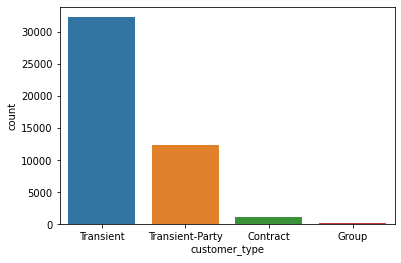

In [38]:
sns.countplot(df['customer_type'])

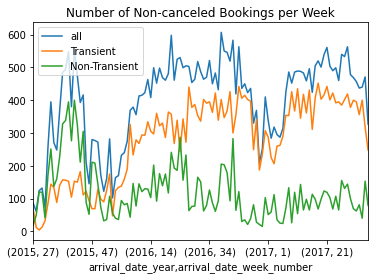

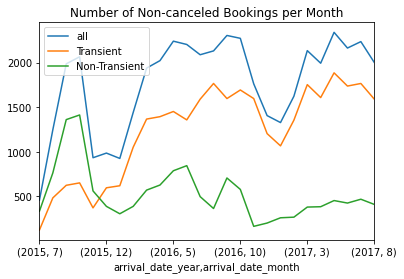

In [43]:
plt.figure(1)
series_customer1_week = df[df['customer_type']=='Transient'].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series_customer2_week = df[df['customer_type']!='Transient'].groupby(['arrival_date_year','arrival_date_week_number'])['hotel'].count()
series.plot()
series_customer1_week.plot()
series_customer2_week.plot()
plt.title('Number of Non-canceled Bookings per Week')
plt.legend(['all', 'Transient','Non-Transient'])
plt.show()
plt.figure(2)
series_customer1_month = df[df['customer_type']=='Transient'].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_customer2_month = df[df['customer_type']!='Transient'].groupby(['arrival_date_year','arrival_date_month'])['hotel'].count()
series_month.plot()
series_customer1_month.plot()
series_customer2_month.plot()
plt.title('Number of Non-canceled Bookings per Month')
plt.legend(['all', 'Transient','Non-Transient'])
plt.show()

Error in callback <function flush_figures at 0x7f4c71d147b8> (for post_execute):


KeyboardInterrupt: 